In [17]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
import numpy as np
import cv2

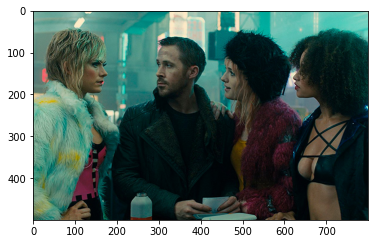

In [2]:
image = plt.imread("images/blade_runner2049.jpg")
plt.imshow(image)

In [3]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

{'box': [293, 87, 78, 115], 'confidence': 0.9999985694885254, 'keypoints': {'left_eye': (301, 129), 'right_eye': (325, 131), 'nose': (296, 153), 'mouth_left': (299, 177), 'mouth_right': (319, 179)}}
{'box': [103, 91, 72, 106], 'confidence': 0.999991774559021, 'keypoints': {'left_eye': (147, 131), 'right_eye': (167, 131), 'nose': (170, 152), 'mouth_left': (146, 172), 'mouth_right': (164, 172)}}
{'box': [451, 113, 62, 98], 'confidence': 0.9999704360961914, 'keypoints': {'left_eye': (462, 147), 'right_eye': (476, 151), 'nose': (453, 166), 'mouth_left': (458, 185), 'mouth_right': (471, 188)}}
{'box': [618, 123, 59, 80], 'confidence': 0.997791051864624, 'keypoints': {'left_eye': (630, 148), 'right_eye': (647, 155), 'nose': (623, 164), 'mouth_left': (622, 178), 'mouth_right': (636, 184)}}


In [4]:
from matplotlib.patches import Rectangle

In [5]:
def highlight_faces(image_path, faces):
  # display image
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)

  ax = plt.gca()

  # for each face, draw a rectangle based on coordinates
  for face in faces:
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
    ax.add_patch(face_border)
  plt.show()

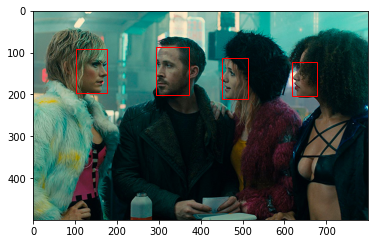

In [6]:
highlight_faces("images/blade_runner2049.jpg", faces)

In [7]:
from numpy import asarray
from PIL import Image

In [8]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  detector = MTCNN()
  faces = detector.detect_faces(image)

  face_images = []

  for face in faces:
    # extract the bounding box from the requested face
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary = image[y1:y2, x1:x2]

    # resize pixels to the model size
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    face_images.append(face_array)

  return face_images

In [9]:
extracted_faces = extract_face_from_image("images/blade_runner2049.jpg")

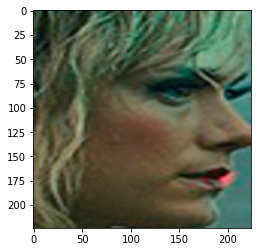

In [10]:
plt.imshow(extracted_faces[1])

In [11]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine

In [13]:
def get_model_scores(faces):
  samples = asarray(faces, 'float32')

  # prepare the data for the model
  samples = preprocess_input(samples, version=2)

  # create a vggface model object
  model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

  # perform prediction
  return model.predict(samples)

In [30]:
faces = extract_face_from_image('images/blade_runner2049.jpg')
target = extract_face_from_image('images/blade_runner2049_2.jpg')
faces = np.array(faces)
faces = np.append(faces, target, axis=0)

model_scores = get_model_scores(faces)


In [29]:
faces.shape #5 face detected

(5, 224, 224, 3)

<Figure size 432x288 with 0 Axes>

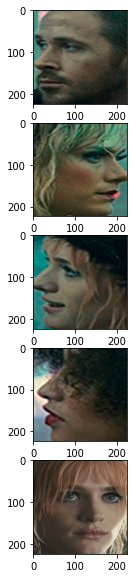

In [39]:
#PLOT ALL FACES
plt.figure()
f, axarr = plt.subplots(5,1, figsize=(10,10))
for i in range(0,5):
    axarr[i].imshow(faces[i])

In [45]:
print("faces as vectors:")
for i in range(0,5):
    print(model_scores[i])

faces as vectors:
[0.         0.01807852 5.7354307  ... 0.26690292 0.4610303  0.38681617]
[0.         1.87786    0.43318027 ... 5.0265803  4.647134   0.        ]
[0.         4.3904767  0.         ... 1.1112823  0.01794001 0.03516926]
[0.         0.         0.98891747 ... 0.         0.         0.23875463]
[0.         5.1343045  0.09573224 ... 3.4500744  1.9250128  1.4108726 ]


In [55]:
threshold = 0.5
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            continue
        if cosine(model_scores[i], model_scores[j]) <= threshold:
            print("Face " + str(i) + " and Face " + str(j) + " are Matched")

Face 2 and Face 4 are Matched
